In [1]:
from lale.datasets import load_movie_review
from lale.helpers import to_graphviz
from lale.helpers import assert_raises
all_X, all_y = load_movie_review()
#only using 20 data items for testing and for training,
#because otherwise, it is too slow
train_X, train_y = all_X[-20:], all_y[-20:]
test_X, test_y = all_X[:20], all_y[:20]
print('truth  {}'.format(test_y.tolist()))

truth  [1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1]


In [2]:
#pre-import, since the first import whines about missing Apex
from lale.lib.pytorch import BertPretrainedEncoder as BERT

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


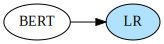

In [3]:
from lale.lib.pytorch import BertPretrainedEncoder as BERT
from lale.lib.sklearn import LogisticRegression as LR
trainable = BERT(batch_size=126) \
  >> LR(LR.solver.sag, LR.class_weight.balanced, 
        C=1970.826, tol=0.023607, fit_intercept=False)
to_graphviz(trainable)

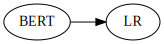

In [4]:
trained = trainable.fit(train_X, train_y)
predicted = trained.predict(test_X)
to_graphviz(trained)

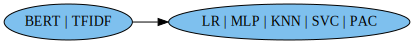

In [5]:
from lale.lib.sklearn import TfidfVectorizer as TFIDF
from lale.lib.sklearn import MLPClassifier as MLP
from lale.lib.sklearn import KNeighborsClassifier as KNN
from lale.lib.sklearn import SVC
from lale.lib.sklearn import PassiveAggressiveClassifier as PAC
planned = (BERT | TFIDF) >> (LR | MLP | KNN | SVC | PAC)
to_graphviz(planned)

Successful trial of hyperopt
best accuracy: 53.3%
best hyperparams found using 1 hyperopt trials: ({'analyzer': 'char', 'binary': True, 'max_df': 0.8212426273992223, 'min_df': 0.029826163136513074, 'name': 'lale.lib.sklearn.tfidf_vectorizer.TfidfVectorizer', 'ngram_range': (2, 2), 'norm': 'l2', 'smooth_idf': False, 'sublinear_tf': False, 'use_idf': False}, {'activation': 'relu', 'alpha': 0.21426234709359254, 'batch_size': 70, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (248, 351, 476, 230, 487, 429, 237, 195, 119, 254, 51, 262, 414, 404, 228, 46, 442, 462, 229), 'learning_rate': 'constant', 'momentum': 0.6744976863209222, 'name': 'lale.lib.sklearn.mlp_classifier.MLPClassifier', 'nesterovs_momentum': True, 'solver': 'sgd', 'tol': 0.0031854592467669388, 'validation_fraction': 0.1})


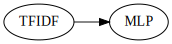

In [6]:
from lale.lib.lale import HyperoptClassifier
cash = HyperoptClassifier(planned, max_evals=1)
trained = cash.fit(train_X, train_y)
to_graphviz(trained)

In [7]:
from sklearn.metrics import accuracy_score
print(f'accuracy {accuracy_score(test_y, predicted):.1%}')

accuracy 60.0%


In [8]:
with assert_raises(AttributeError):
    planned.fit(trained_X, trained_y)

{error: '''PlannedPipeline'' object has no attribute ''fit'''}


In [9]:
predicted = trained.predict(test_X)
print(f'accuracy {accuracy_score(test_y, predicted):.1%}')

accuracy 55.0%
